# StyleGAN3 Image Generation

## StyleGAN3: Advancements in Generative Adversarial Networks

**StyleGAN3**, introduced by NVIDIA, addresses **aliasing issues** in previous GAN architectures. Unlike earlier models, StyleGAN3 eliminates reliance on absolute pixel coordinates, ensuring **equivariance to translation and rotation**. This results in more **coherent and natural outputs**, making it especially valuable for video and animation applications.

### **Key Improvements Over StyleGAN2**

- **Alias-Free Generation**: Unlike StyleGAN2, where details were "glued" to fixed pixel coordinates, StyleGAN3 ensures that image details **move naturally with the objects**, improving realism.  
- **Continuous Signal Processing**: Treats all network signals as continuous, preventing unwanted artifacts from leaking into the synthesis process.  
- **Full Equivariance to Translation & Rotation**: Guarantees that transformations like moving or rotating objects do not introduce inconsistencies, even at subpixel scales.  
- **More Natural Internal Representations**: While StyleGAN3 achieves similar **Fréchet Inception Distance (FID)** scores to StyleGAN2, its internal data representation is fundamentally different, leading to **improved object consistency across frames**.  

### **Under the Hood: Architectural Changes**
StyleGAN3 makes several architectural refinements to achieve alias-free synthesis:

- **Filtered Activation Maps**: Traditional CNNs introduce aliasing when downsampling or upsampling. StyleGAN3 applies **carefully designed low-pass filters** to ensure smooth signal transformations.  
- **Implicit Continuous Representations**: Instead of treating feature maps as discrete pixel grids, the model interprets them as **continuous functions**, allowing seamless transformations.  
- **Frequency-Based Modulation**: Instead of rigid pixel-space transformations, StyleGAN3 **controls features in a spectral domain**, preserving spatial relationships across different scales.  

These improvements make **StyleGAN3 ideal for video generation and animation**, where maintaining temporal consistency is crucial.

### **Datasets Utilized**
StyleGAN3 has been trained on several datasets, including:

- **FFHQ (Flickr-Faces-HQ)**: High-quality human face images.  
- **AFHQv2 (Animal Faces-HQ)**: High-resolution images of various animal faces.  
- **MetFaces**: Artistic portraits dataset.  


Ensure that Google Colab is running.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


## Generating StyleGAN3 Faces with Colab

In [2]:
# Cloning the repo
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 212 (delta 0), reused 0 (delta 0), pack-reused 208 (from 2)
Receiving objects: 100% (212/212), 4.16 MiB | 7.82 MiB/s, done.
Resolving deltas: 100% (101/101), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 8.9 MB/s eta 0:00:00


Verify that StyleGAN3 has been cloned.

In [3]:
!ls /content/stylegan3

avg_spectra.py	 dnnlib      environment.yml  gui_utils    metrics	training       viz
calc_metrics.py  Dockerfile  gen_images.py    legacy.py    README.md	train.py
dataset_tool.py  docs	     gen_video.py     LICENSE.txt  torch_utils	visualizer.py


## **Understanding Seed and Latent Vectors in StyleGAN**

In **StyleGAN**, images are generated from a **seed number**, an integer (e.g., `5800`), which is mapped to a **latent vector**—a 512-dimensional array of floating-point values. This latent vector serves as the foundation for generating unique images through the GAN model.

### **Key Considerations**
- **Seed vs. Latent Vector**: While the seed provides a convenient way to represent the latent vector in code, it is merely a method for initializing the generation process.  
- **Impact of Small Changes**: A **small modification to the latent vector** results in a subtle alteration of the image. However, even a **minor change in the integer seed** can produce a **drastically different** output due to the way random initialization influences the vector generation.  

Understanding this relationship is crucial when fine-tuning outputs in StyleGAN-based image synthesis.


In [4]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/"\
      "stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=6399-6411

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
Generating image for seed 6399 (0/13) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... /usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Generating image for seed 6400 (1/13) ...
Generating image for seed 6401 (2/13) ...
Generating image for seed 6402 (3/13) ...
Generating image for seed 6403 (4/13) ...
Gene

We can now display the images created.

In [5]:
!ls /content/results

seed6399.png  seed6401.png  seed6403.png  seed6405.png	seed6407.png  seed6409.png  seed6411.png
seed6400.png  seed6402.png  seed6404.png  seed6406.png	seed6408.png  seed6410.png


It is possible to download locally as well.

In [7]:
!zip -r /content/results.zip /content/results
from google.colab import files
files.download("/content/results.zip")

  adding: content/results/ (stored 0%)
  adding: content/results/seed6403.png (deflated 0%)
  adding: content/results/seed6411.png (deflated 0%)
  adding: content/results/seed6410.png (deflated 0%)
  adding: content/results/seed6406.png (deflated 0%)
  adding: content/results/seed6405.png (deflated 0%)
  adding: content/results/seed6400.png (deflated 0%)
  adding: content/results/seed6399.png (deflated 0%)
  adding: content/results/seed6407.png (deflated 0%)
  adding: content/results/seed6402.png (deflated 0%)
  adding: content/results/seed6409.png (deflated 0%)
  adding: content/results/seed6404.png (deflated 0%)
  adding: content/results/seed6401.png (deflated 0%)
  adding: content/results/seed6408.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Run StyleGAN3 with Python

Add the StyleGAN3 folder to Python so that you can import it.  

In [8]:
import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8,
         nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs)
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail("Must specify class label with --class when using "\
            "a conditional network")
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ("warn: --class=lbl ignored when running on "\
            "an unconditional network")
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const',
                   class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(\
      torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

In [9]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...


We can now generate images from integer seed codes in Python.

Seed 6537
Setting up PyTorch plugin "bias_act_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


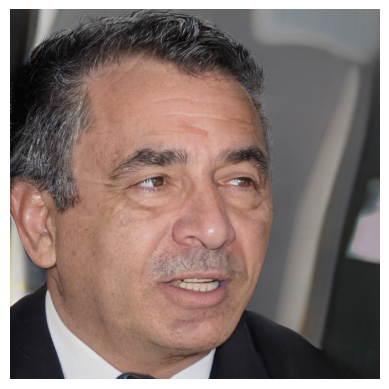

Seed 6538


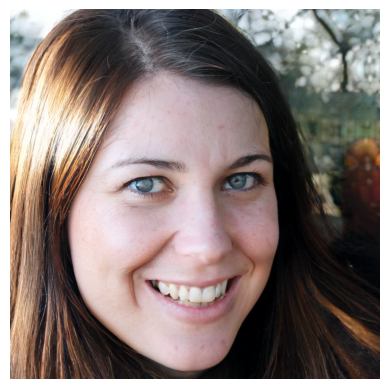

Seed 6539


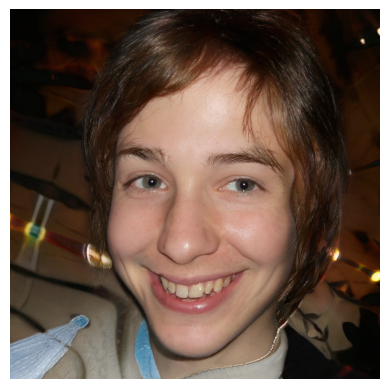

Seed 6540


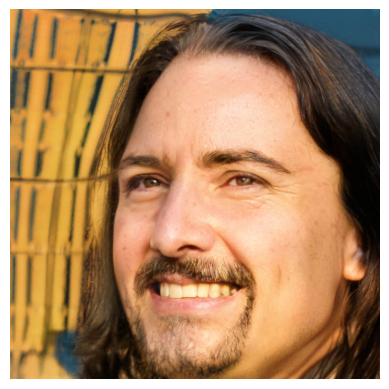

Seed 6541


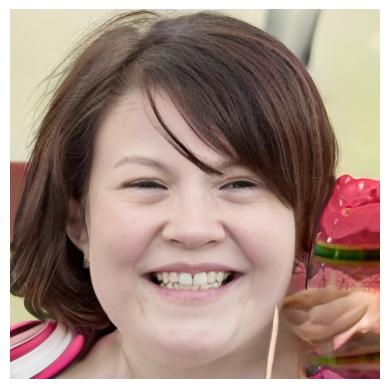

Seed 6542


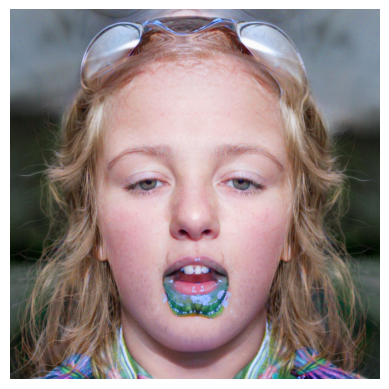

Seed 6543


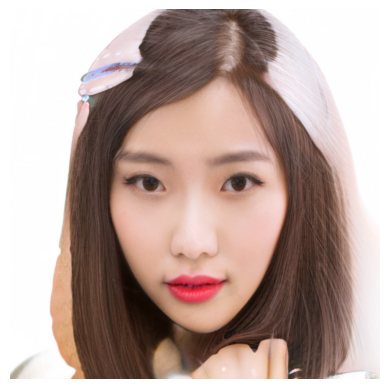

Seed 6544


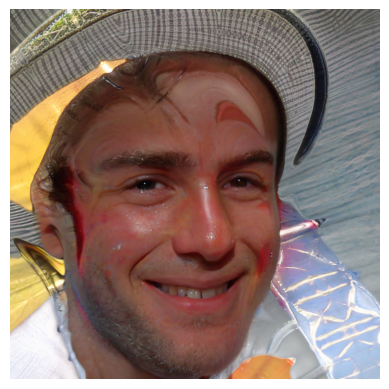

Seed 6545


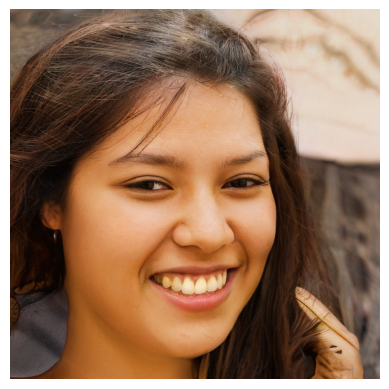

Seed 6546


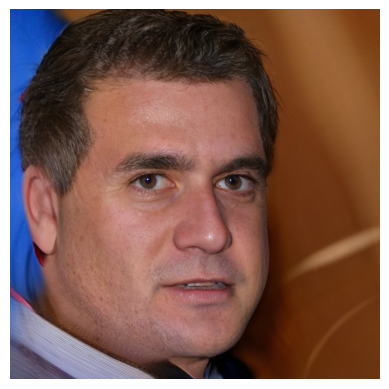

In [10]:
# Choose your own starting and ending seed.
SEED_FROM = 6537
SEED_TO = 6547

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)

## The Latent Vector Interpolation

We accomplish this transformation by slowly moving one 512-value latent vector to another 512 vector. A high-dimension point between two latent vectors will appear similar to both of the two endpoint latent vectors. Images that have similar latent vectors will appear similar to each other.

In [11]:
def expand_seed(seeds, vector_size):
  result = []

  for seed in seeds:
    rnd = np.random.RandomState(seed)
    result.append( rnd.randn(1, vector_size) )
  return result

URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/"\
  "versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

vector_size = G.z_dim
# range(8192,8300)
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)
print(seeds[0].shape)

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhq-1024x1024.pkl"...
(1, 512)


The following code will move between the provided seeds.  The constant STEPS specify how many frames there should be between each seed.

In [12]:
# Choose your seeds to morph through and the number of steps to
# take to get to each.

SEEDS = [6543,6538,6532] # Better for faces
STEPS = 150

# Remove any prior results
!rm /content/results/*

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(G, SEEDS[i])
  v2 = seed2vec(G, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    img = generate_image(device, G, current)
    img.save(f'./results/frame-{idx}.png')
    idx+=1

# Link the images into a video.
!ffmpeg -r 30 -i /content/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

Seed 6543:   0%|          | 0/150 [00:00<?, ?it/s]

Seed 6538:   0%|          | 0/150 [00:00<?, ?it/s]

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Download the generated video.

In [13]:
from google.colab import files
files.download('movie.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>